In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

print(sys.version)
print('Numpy  : ' + np.__version__)
print('Pandas : ' + pd.__version__)

3.8.2 | packaged by conda-forge | (default, Mar 23 2020, 17:55:48) 
[Clang 9.0.1 ]
Numpy  : 1.18.1
Pandas : 1.0.3


<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h1 style=font-size:40px> ETL des Dataframe "AirBnB-Listings" </h1>
</div>

 <div class="alert alert-info alertinfo" style="margin-top: 20px">
Extrahiert wurden die Daten von der Website "http://insideairbnb.com/get-the-data.html" als csv-Datei (listings.csv.gz). Die Datei ist entpackt 106 MB groß und konnte ohne große Umstände in Pandas importiert werden.
</div>

In [2]:
df_complete = pd.read_csv('listings_detailed.csv')
#df_complete = pd.read_csv('C:/Users/Alfa/Desktop/Big Data Analytics/Projektarbeit/Lissabon/listings_detailed.csv') ### Irene
df_complete.shape

/Users/dirkschulz/anaconda3/envs/AirBnB-Lissabon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(25056, 106)

 <div class="alert alert-info alertinfo" style="margin-top: 20px">
    Es gibt 25.056 Zeilen und 106 Spalten.
    Die Warnmeldung, die oben angezeigt wird, ist nicht kritisch.
</div>

In [3]:
df_complete.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20191128004842,2019-11-28,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",...,t,f,moderate,f,f,1,1,0,0,0.39
1,25659,https://www.airbnb.com/rooms/25659,20191128004842,2019-11-28,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Sunny 1 Bedroom cozy apartment in historic Alf...,"Charming, sunny, cozy apartment in the heart o...",Sunny 1 Bedroom cozy apartment in historic Alf...,none,Alfama is the oldest and most picturesque quar...,...,t,f,moderate,f,f,1,1,0,0,1.64


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Anzeige aller Spaltennamen (insgesamt 106 Spalten):
</div>

In [4]:
list(df_complete.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Auswahl bestimmter Spalten (Features) und Zeilen ('neighbourhood_group' == 'Lissabon):
</div>

In [5]:
selected_columns = ['host_total_listings_count', 'host_has_profile_pic', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type',
                    'room_type', 'accommodates', 'bathrooms',  'bedrooms', 'beds',  'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
                    'security_deposit',  'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'review_scores_rating', 'cancellation_policy']
df_base = df_complete[selected_columns]
df_base_lisbon = df_base[df_base['neighbourhood_group_cleansed'] == 'Lisboa']
df_base_lisbon = df_base_lisbon.drop(['neighbourhood_group_cleansed'], axis=1)
df_base_lisbon = df_base_lisbon.reset_index(drop=True)
df_base_lisbon.head(3)

,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,review_scores_rating,cancellation_policy
0,1.0,t,Belm,38.69675,-9.19840,Apartment,Entire home/apt,3,1.0,1.0,...,$36.00,$209.00,$579.00,$100.00,$35.00,2,$15.00,3,90.0,moderate
1,1.0,t,Santa Maria Maior,38.71167,-9.12696,Apartment,Entire home/apt,3,1.0,1.0,...,$60.00,$350.00,NaN,$150.00,$30.00,2,$0.00,3,96.0,moderate
2,1.0,t,Areeiro,38.73634,-9.13792,Apartment,Private room,1,NaN,1.0,...,$71.00,NaN,NaN,NaN,NaN,1,$0.00,1,NaN,flexible


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Der Datensatz enthält nun 23 Spalten. <br>
Der Datensatz wird unter einem neuen Namen im csv-Format abgespeichert.
</div>

In [6]:
#df_base_lisbon.to_csv('Dataframe_Base_Lisbon.csv', sep=';', index=False)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
<h3>  Erste Übersicht über die Daten</h3>
</div>

In [7]:
df_base_lisbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  18214 non-null  float64
 1   host_has_profile_pic       18214 non-null  object 
 2   neighbourhood_cleansed     18227 non-null  object 
 3   latitude                   18227 non-null  float64
 4   longitude                  18227 non-null  float64
 5   property_type              18227 non-null  object 
 6   room_type                  18227 non-null  object 
 7   accommodates               18227 non-null  int64  
 8   bathrooms                  18209 non-null  float64
 9   bedrooms                   18220 non-null  float64
 10  beds                       18149 non-null  float64
 11  amenities                  18227 non-null  object 
 12  square_feet                316 non-null    float64
 13  price                      18227 non-null  obj

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <ul>
        <li> Alle Spalten mit weniger als 10000 non-null Elementen werden nicht weiter berücksichtigt</li>
        <li> Manche Spalten mit den Dateitypen "object" müssen in float, int oder boolean konvertiert werden</li>
    </ul>
</div>

<div class="alert alert-info alertinfo" style="margin-top: 20px">
 <ul>
 <li> Entferne die Spalten "square_feet", "weekly_price" und "monthly_price"</li>
 </ul>
</div>

In [8]:
df_base_lisbon = df_base_lisbon.drop(['square_feet', 'weekly_price', 'monthly_price'], axis=1)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
 <ul>
 <li> Ändere den Spaltennamen von "neighbourhood_cleansed" (wichtig für die geografische Darstellung später)</li>
 </ul>
</div>

In [9]:
df_base_lisbon = df_base_lisbon.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})

<div class="alert alert-info alertinfo" style="margin-top: 20px">
 <ul>
 <li> Konvertiere die Spalte "host_has_profile_pic" in Boolean
     <br>
     (Wir waren uns erst nicht sicher, ob das Model die boolischen Werte versteht, konnten später aber feststellen, dass das kein Problem ist <br> -> siehe standard scaler).
     </li>
 </ul>
</div>

In [10]:
d = {'t': True, 'f': False}
df_base_lisbon['host_has_profile_pic'] = df_base_lisbon['host_has_profile_pic'].map(d).astype(bool)
df_base_lisbon['host_has_profile_pic']

0        True
1        True
2        True
3        True
4        True
         ... 
18222    True
18223    True
18224    True
18225    True
18226    True
Name: host_has_profile_pic, Length: 18227, dtype: bool

<div class="alert alert-info alertinfo" style="margin-top: 20px">
 <ul>
 <li> Konvertiere die Spalten mit Preisen in Floats</li>
 </ul>
</div>

In [11]:
for i in ['price', 'security_deposit', 'cleaning_fee', 'extra_people']:
    df_base_lisbon[i] = df_base_lisbon[i].str.replace(',', '').str.replace('$', '').astype('float32')

<div class="alert alert-info alertinfo" style="margin-top: 20px">
 <ul>
 <li> Preise, die kleiner als 1 Euro sind machen keinen Sinn. Deswegen hier die Prüfung auf Presie kleiner 1 Euro:</li>
 </ul>
</div>

In [12]:
print(len(df_base_lisbon[df_base_lisbon['price'] < 1]))

54


<div class="alert alert-info alertinfo" style="margin-top: 20px">
 <ul>
 <li> Es gibt insgesamt 54 Einträge mit Preisen kleiner als 1 Euro. Die Zeilen werden entfernt:
     <br>
     Wir haben nun einen Datensatz mit 18.173 Zeilen und 20 Spalten.
     <br>
     In manchen Spalten fehlen Werte.</li>
 </ul>
</div>

In [13]:
df_base_lisbon = df_base_lisbon.drop(df_base_lisbon[df_base_lisbon['price'] < 1].index)
df_base_lisbon = df_base_lisbon.reset_index(drop=True)
df_base_lisbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18173 entries, 0 to 18172
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  18160 non-null  float64
 1   host_has_profile_pic       18173 non-null  bool   
 2   neighbourhood              18173 non-null  object 
 3   latitude                   18173 non-null  float64
 4   longitude                  18173 non-null  float64
 5   property_type              18173 non-null  object 
 6   room_type                  18173 non-null  object 
 7   accommodates               18173 non-null  int64  
 8   bathrooms                  18155 non-null  float64
 9   bedrooms                   18166 non-null  float64
 10  beds                       18095 non-null  float64
 11  amenities                  18173 non-null  object 
 12  price                      18173 non-null  float32
 13  security_deposit           14060 non-null  flo

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h1 style=font-size:40px> Deskriptive Statistik und Visualisierung </h1>
</div>

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Visualisierung der nummerischen Features in einem Histogramm
</div>

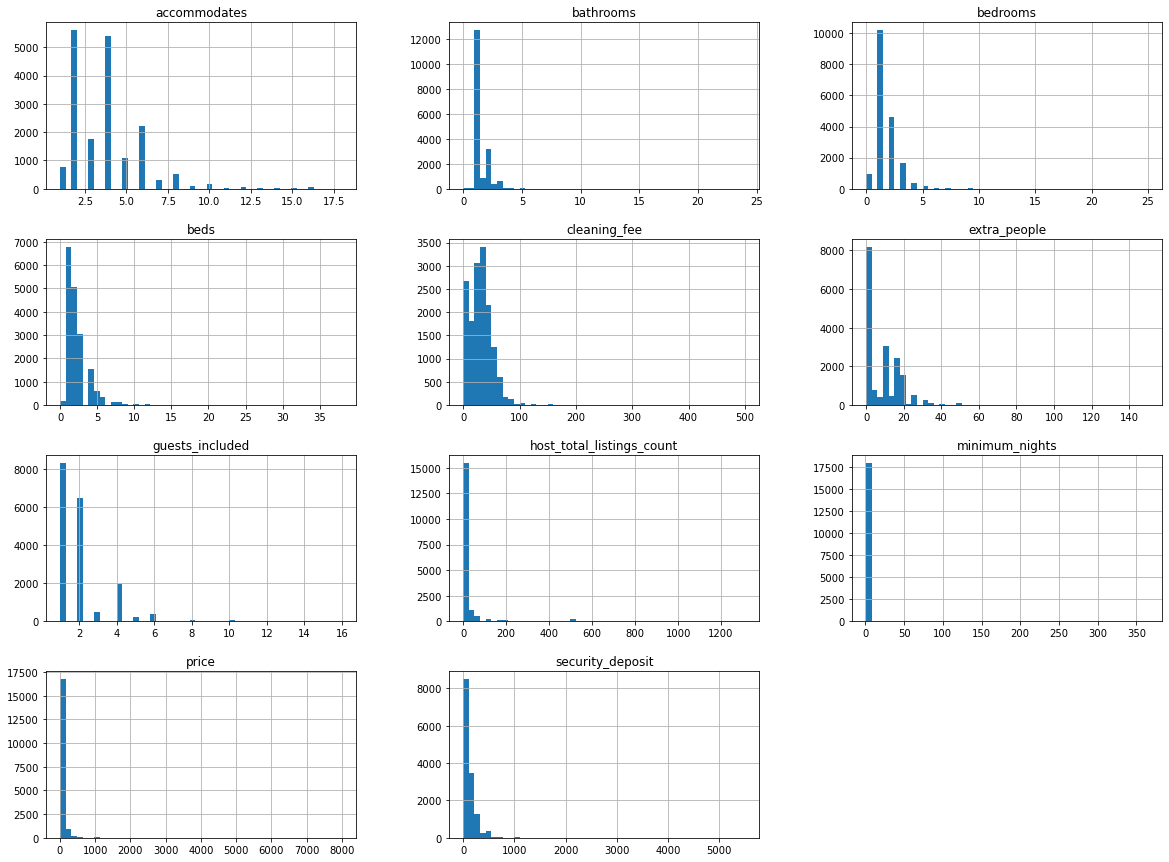

In [14]:
df_base_lisbon[["price","host_total_listings_count","accommodates","bathrooms","bedrooms","beds","security_deposit",
 "cleaning_fee", "guests_included","extra_people", "minimum_nights"]].hist(bins=50, figsize=(20,15));

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Visualisierung einiger kategorialen Features im Kuchen- oder Balkendiagramm
 <ul>
 <li> Room type      
</li>
 </ul>
</div>

In [15]:
df_pie=df_base_lisbon["room_type"].value_counts()
df_pie

Entire home/apt    13467
Private room        3988
Hotel room           474
Shared room          244
Name: room_type, dtype: int64

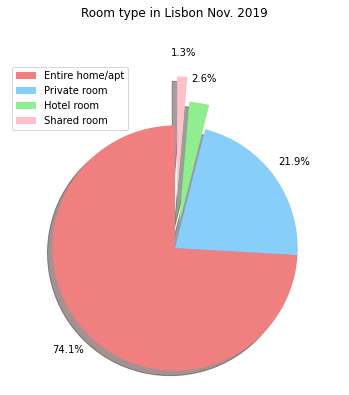

In [16]:
colors_list = ['lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0.1, 0.2] 
                                       
df_pie.plot(kind='pie', figsize=(6, 6), radius=0.5, autopct='%1.1f%%', startangle=90, shadow=True,
            labels=None, pctdistance=1.2, colors=colors_list, explode=explode_list)

plt.title('Room type in Lisbon Nov. 2019', y=1.12) 
plt.axis('equal') 
plt.ylabel("")
plt.legend(labels=df_pie.index, loc='upper left') 
plt.show()

<div class="alert alert-info alertinfo" style="margin-top: 20px">
 <ul>
 <li> Property type      
</li>
 </ul>
</div>

In [17]:
df_prop=df_base_lisbon["property_type"].value_counts()
df_prop

Apartment                 15685
Condominium                 344
Serviced apartment          341
House                       283
Guesthouse                  250
Loft                        237
Hostel                      218
Boutique hotel              155
Bed and breakfast           149
Guest suite                  89
Camper/RV                    78
Boat                         76
Townhouse                    71
Aparthotel                   65
Hotel                        34
Castle                       23
Other                        20
Tiny house                   16
Villa                        10
Houseboat                     7
Nature lodge                  7
Cottage                       6
Earth house                   2
Bungalow                      2
Bus                           1
Dome house                    1
Hut                           1
Chalet                        1
Casa particular (Cuba)        1
Name: property_type, dtype: int64

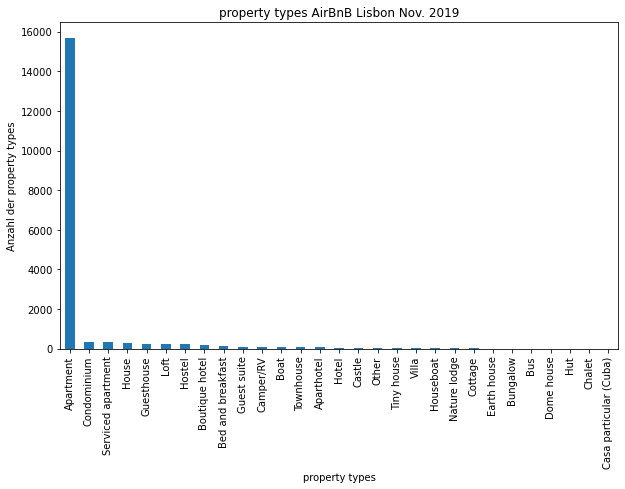

In [18]:
df_prop.plot(kind='bar', figsize=(10, 6))

plt.xlabel('property types')
plt.ylabel('Anzahl der property types')
plt.title('property types AirBnB Lisbon Nov. 2019')

plt.show()

<div class="alert alert-info alertinfo" style="margin-top: 20px">
 <ul>
 <li> Cancellation policy     
</li>
 </ul>
</div>

In [19]:
df_pie2=df_base_lisbon["cancellation_policy"].value_counts()
df_pie2

strict_14_with_grace_period    8306
moderate                       6428
flexible                       3266
super_strict_30                 115
super_strict_60                  51
luxury_moderate                   6
strict                            1
Name: cancellation_policy, dtype: int64

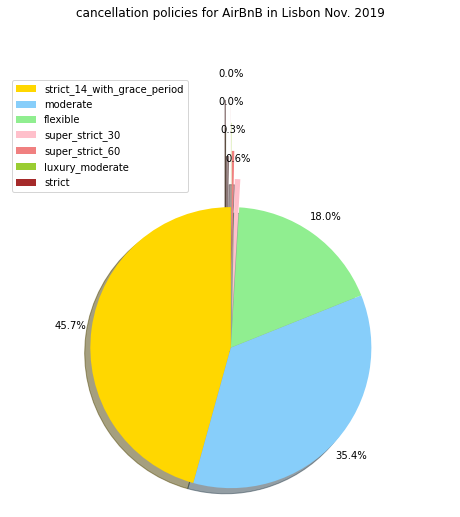

In [20]:
colors_list = ['gold', 'lightskyblue', 'lightgreen', 'pink','lightcoral', 'yellowgreen', 'brown']
explode_list = [0, 0, 0, 0.1, 0.2, 0.3, 0.4]

df_pie2.plot(kind='pie', figsize=(8, 8), radius=0.5, autopct='%1.1f%%', startangle=90, shadow=True,
            labels=None, pctdistance=1.15, colors=colors_list, explode=explode_list )

plt.title('cancellation policies for AirBnB in Lisbon Nov. 2019', y=1.12) 
plt.axis('equal') 
plt.ylabel("")
plt.legend(labels=df_pie2.index, loc='upper left') 
plt.show()

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Deskriptive Statistik
</div>

In [21]:
df_base_lisbon.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,review_scores_rating
count,18160.000000,18173.000000,18173.000000,18173.000000,18155.000000,18166.000000,18095.000000,18173.000000,14060.000000,15398.000000,18173.000000,18173.000000,18173.000000,15779.000000
mean,23.435683,38.720974,-9.143346,3.846916,1.368080,1.549708,2.321912,96.637924,120.799362,28.618261,2.016398,8.438562,2.640015,91.998352
std,71.287450,0.015397,0.018533,2.156977,0.803401,1.081349,1.782929,178.626709,237.455322,21.096109,1.497616,10.323975,7.605343,8.410995
min,0.000000,38.692280,-9.226560,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.000000
25%,1.000000,38.711300,-9.150510,2.000000,1.000000,1.000000,1.000000,47.000000,0.000000,15.000000,1.000000,0.000000,1.000000,89.000000
50%,4.000000,38.716010,-9.141290,4.000000,1.000000,1.000000,2.000000,67.000000,100.000000,30.000000,2.000000,7.000000,2.000000,94.000000
75%,14.000000,38.726490,-9.132480,5.000000,1.500000,2.000000,3.000000,100.000000,200.000000,40.000000,2.000000,15.000000,3.000000,97.000000
max,1311.000000,38.792840,-9.091230,18.000000,24.000000,25.000000,38.000000,8000.000000,5500.000000,500.000000,16.000000,150.000000,365.000000,100.000000


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Boxplots für nummerische Features
</div>

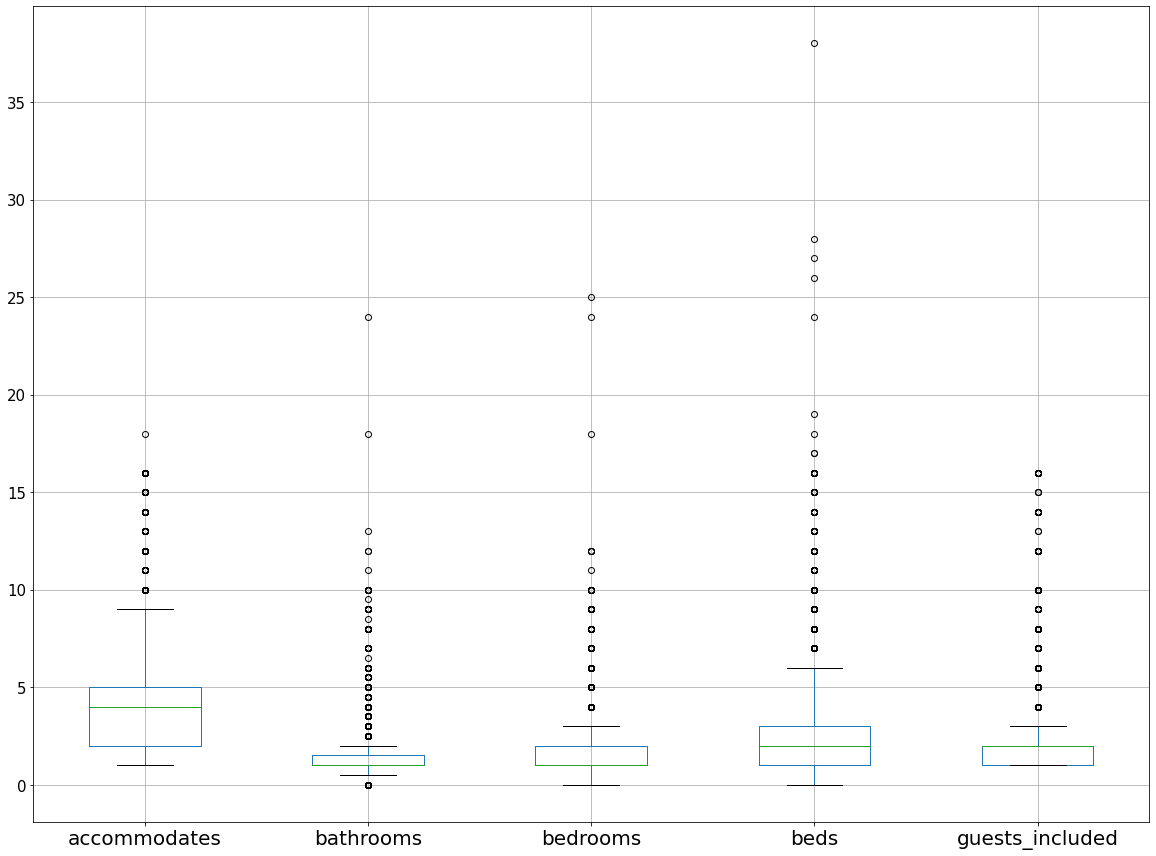

In [22]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=15)

df_base_lisbon[["accommodates","bathrooms","bedrooms","beds",
                "guests_included"]].boxplot(figsize=(20,15));

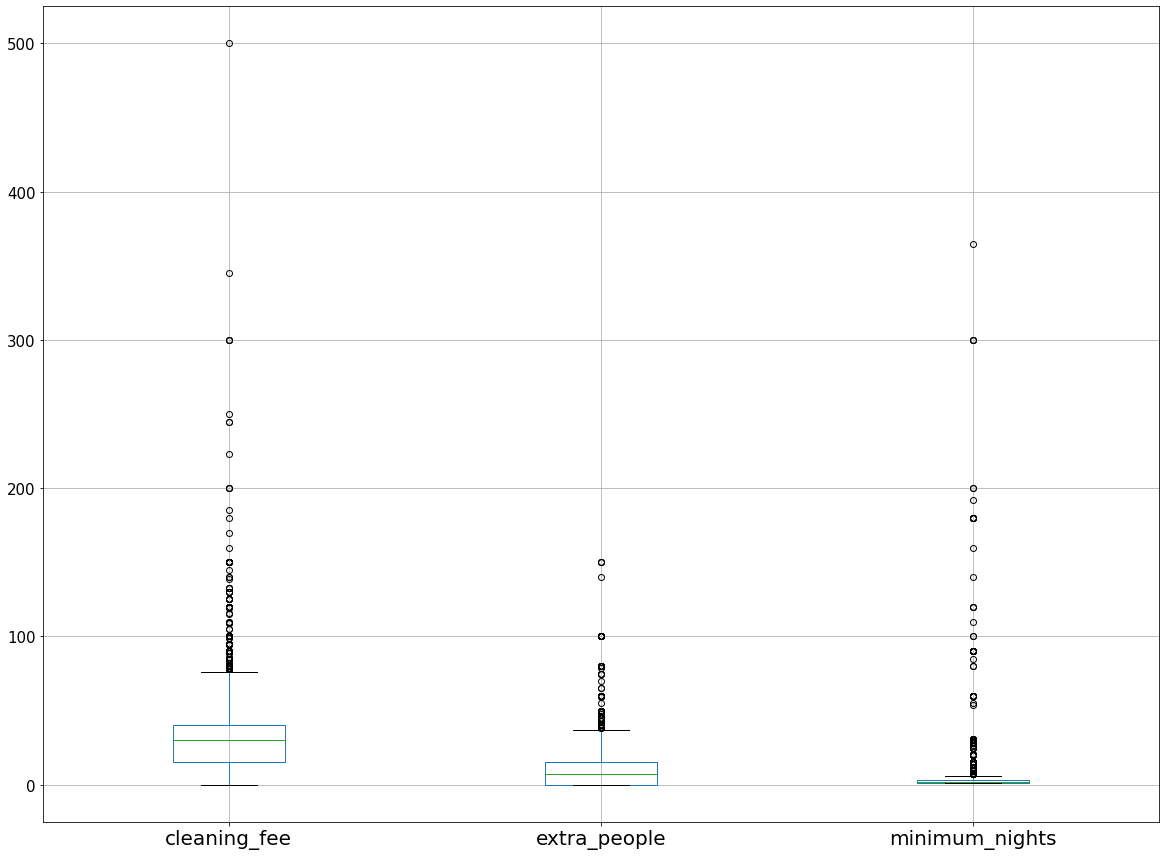

In [23]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=15)

df_base_lisbon[["cleaning_fee","extra_people", "minimum_nights"]].boxplot(figsize=(20,15));

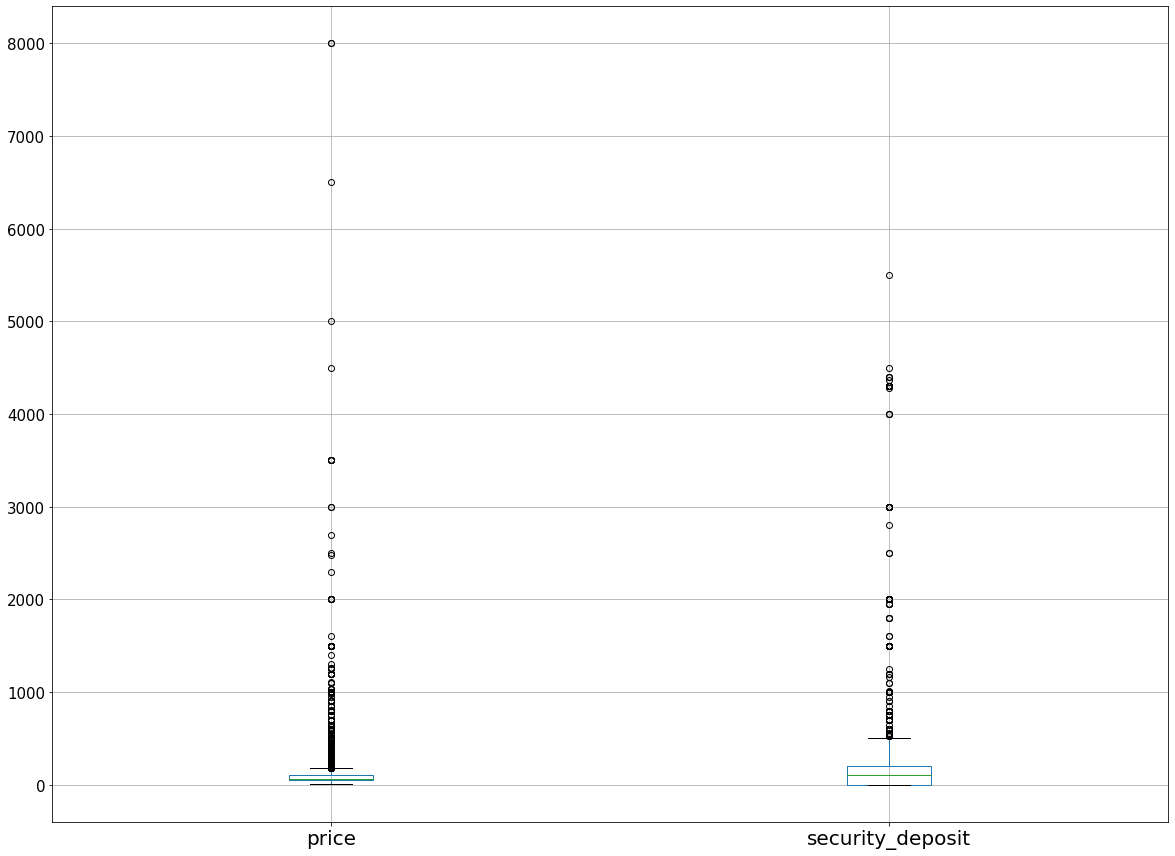

In [24]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=15)

df_base_lisbon[["price", "security_deposit",]].boxplot(figsize=(20,15));

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Korrelationen nur für den Preis
</div>

In [25]:
corr_matrix = df_base_lisbon.corr()
corr_matrix['price'].sort_values(ascending=False)

price                        1.000000
bedrooms                     0.225526
accommodates                 0.212749
beds                         0.212746
cleaning_fee                 0.199350
security_deposit             0.177656
bathrooms                    0.176166
guests_included              0.129194
review_scores_rating         0.087298
extra_people                 0.021504
host_total_listings_count    0.020653
minimum_nights               0.008234
latitude                    -0.005979
longitude                   -0.030649
host_has_profile_pic        -0.095377
Name: price, dtype: float64

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Korrelationen und Heatmap
</div>

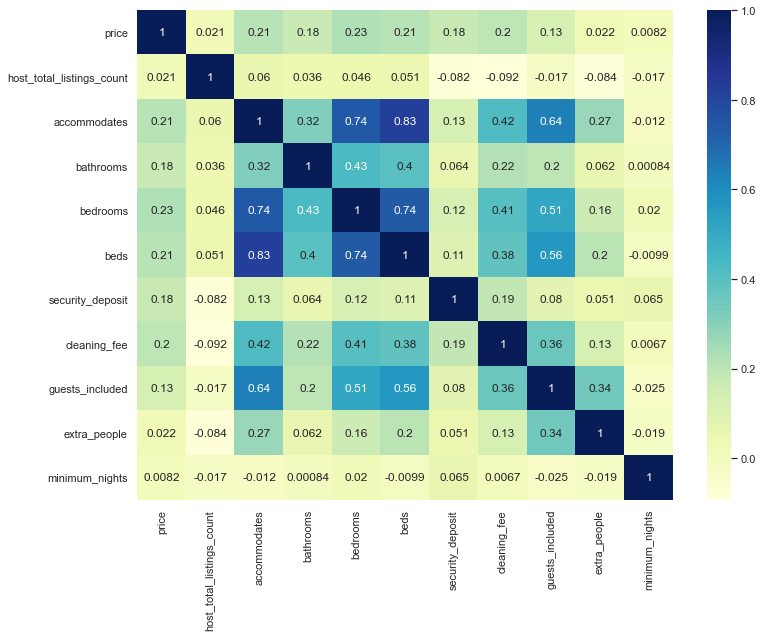

In [26]:
from pandas import DataFrame
import seaborn as sn

df = DataFrame(df_base_lisbon,columns=["price","host_total_listings_count","accommodates","bathrooms",
                                       "bedrooms","beds","security_deposit","cleaning_fee",
                                       "guests_included","extra_people", "minimum_nights"])

corrMatrix = df.corr()
sn.set(rc={'figure.figsize':(12,9)})
sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu")

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Von den nummerischen Features gibt es keine besonders hohen Korrelationen mit dem Preis.
    <br>
Die höhste Korrelation besteht zwischen Preis und Anzahl der Schlafzimmer mit 0.23.
    <br>
Ansonsten ist die höhste Korrelation zwischen Betten und der Anzahl der Gäste (accommodates) mit 0.83. 
</div>

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h3> Darstellung der Stadtteile </h3>
</div>

In [27]:
import geopandas as gp

df_geo = gp.read_file('neighbourhoods.geojson')
#df_geo = gp.read_file('C:/Users/Alfa/Desktop/Big Data Analytics/Projektarbeit/Lissabon/neighbourhoods.geojson') ## Irene

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Die Datei enthält Informationen über die Lage der Bezirke in und um Lissabon (bis ca. 70km entfernt). Uns interessieren nur die Bezirke im Stadtgebiet von Lissabon:
</div>

In [28]:
df_geo_lisbon = df_geo[['neighbourhood', 'geometry']][df_geo['neighbourhood_group'] == 'Lisboa']
df_geo_lisbon = df_geo_lisbon.reset_index(drop=True)
df_geo_lisbon = df_geo_lisbon.to_crs(epsg=3857)
df_geo_lisbon

,neighbourhood,geometry
0,Lumiar,"MULTIPOLYGON (((-1017658.517 4689882.699, -101..."
1,Estrela,"MULTIPOLYGON (((-1019041.439 4680956.992, -101..."
2,Marvila,"MULTIPOLYGON (((-1013349.340 4686743.573, -101..."
3,So Domingos de Benfica,"MULTIPOLYGON (((-1020763.329 4686968.121, -102..."
4,Benfica,"MULTIPOLYGON (((-1022728.563 4686270.368, -102..."
5,Alvalade,"MULTIPOLYGON (((-1016185.426 4687781.275, -101..."
6,Avenidas Novas,"MULTIPOLYGON (((-1018071.067 4685211.125, -101..."
7,Misericrdia,"MULTIPOLYGON (((-1017839.745 4680937.447, -101..."
8,Carnide,"MULTIPOLYGON (((-1021377.701 4690243.831, -102..."
9,So Vicente,"MULTIPOLYGON (((-1014727.030 4681478.318, -101..."


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Es gibt insgesamt 24 Stadtteile in Lissabon
</div>

<br>

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Finde einen "Representative Point" für jeden Stadtteil, um dann an diesem Punkt den Namen des Stadtviertels zu plotten.
</div>

In [29]:
df_geo_lisbon['coords'] = df_geo_lisbon['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo_lisbon['coords'] = [coords[0] for coords in df_geo_lisbon['coords']]

def plot_neighbourhoods_labels(df):
    for idx, row in df.iterrows():
        plt.gca().annotate(s=row['neighbourhood'], xy=row['coords'], horizontalalignment='center', color='red')

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h5>Mittlerer Preis pro Nacht in den verschiedenen Stadtteilen von Lissabon:</h5>
</div>

In [30]:
mean_prices = df_base_lisbon.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
print(type(mean_prices))
mean_prices

<class 'pandas.core.series.Series'>


neighbourhood
Benfica                   196.388885
So Domingos de Benfica    182.413177
Marvila                   181.268814
Carnide                   172.981125
Lumiar                    112.365593
Parque das Naes           111.820374
Santo Antnio              106.278046
Avenidas Novas            104.490372
Santa Maria Maior         104.346771
Misericrdia               103.748795
Belm                      102.322220
Campo de Ourique           91.363411
Estrela                    90.714417
Ajuda                      86.344261
Arroios                    83.327873
So Vicente                 82.527740
Alcntara                   80.146706
Areeiro                    78.203934
Campolide                  76.482590
Alvalade                   73.255722
Penha de Frana             64.029922
Santa Clara                62.583332
Olivais                    62.140095
Beato                      60.510418
Name: price, dtype: float32

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Die beiden Dataframes "mean_prices" und "df_geo_lisbon" werden miteinander verknüpft.
</div>

In [31]:
df_spatial_mean_prices = df_geo_lisbon.merge(mean_prices.to_frame(), left_on='neighbourhood', right_on='neighbourhood')

In [32]:
df_spatial_mean_prices.head()

,neighbourhood,geometry,coords,price
0,Lumiar,"MULTIPOLYGON (((-1017658.517 4689882.699, -101...","(-1020105.7086823697, 4688993.131464471)",112.365593
1,Estrela,"MULTIPOLYGON (((-1019041.439 4680956.992, -101...","(-1020041.1930831214, 4679232.129844386)",90.714417
2,Marvila,"MULTIPOLYGON (((-1013349.340 4686743.573, -101...","(-1014170.4551012731, 4685551.609316366)",181.268814
3,So Domingos de Benfica,"MULTIPOLYGON (((-1020763.329 4686968.121, -102...","(-1021486.5384067053, 4685369.7688001655)",182.413177
4,Benfica,"MULTIPOLYGON (((-1022728.563 4686270.368, -102...","(-1023600.5358765323, 4684200.800285541)",196.388885


In [33]:
type(df_spatial_mean_prices)

geopandas.geodataframe.GeoDataFrame

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Hier wird ein GeoDataFrame dargestellt. 
<br> Das .plot-command hat eine andere Form als die herkömmliche matplotlib-command.
</div>

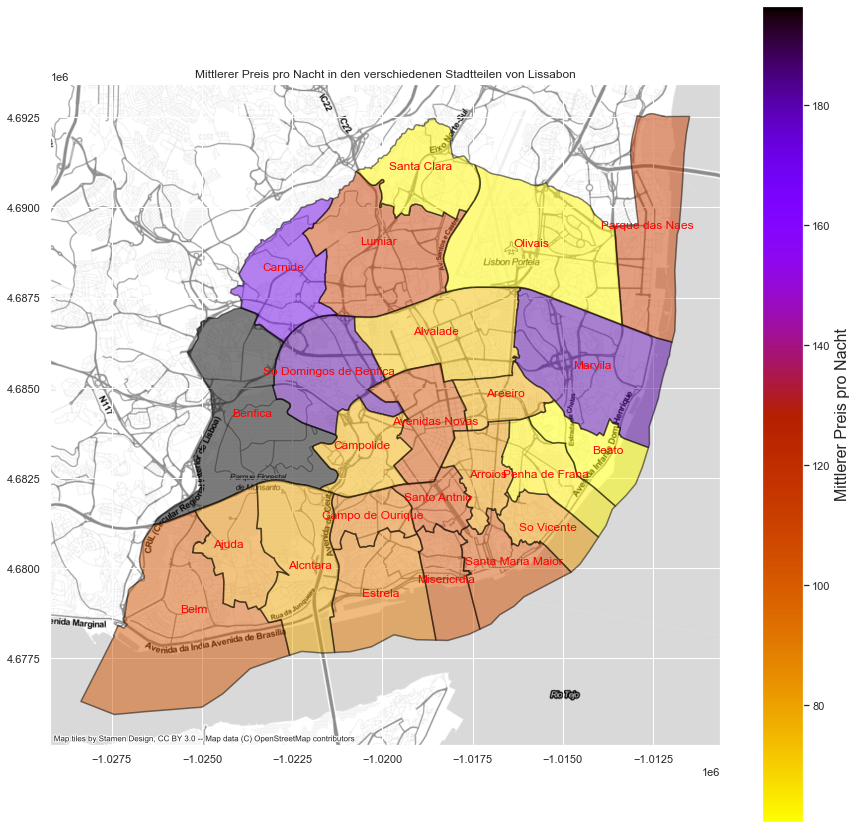

In [34]:
import contextily as ctx

fig, ax = plt.subplots(figsize=(15,15))
df_spatial_mean_prices.plot(ax=ax, column='price', cmap='gnuplot_r', linewidth=1.5, edgecolor='black', legend=True, alpha=0.5)
plt.gcf().get_axes()[1].set_ylabel('Mittlerer Preis pro Nacht', fontsize=16)
plt.title('Mittlerer Preis pro Nacht in den verschiedenen Stadtteilen von Lissabon')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)

plot_neighbourhoods_labels(df_spatial_mean_prices)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Hier sieht man noch einmal, dass Benfica, der Stadtteil mit den höchsten Übernachtungspreisen ist.
</div>

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h5>Anzahl der Unterkünfte in den verschiedenen Stadtteilen von Lissabon:</h5>
</div>

In [35]:
number_of_places_per_hood = df_base_lisbon.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False)
number_of_places_per_hood

neighbourhood
Santa Maria Maior         3821
Misericrdia               3109
Arroios                   2321
So Vicente                1478
Santo Antnio              1471
Estrela                   1124
Avenidas Novas             779
Penha de Frana             635
Areeiro                    407
Campo de Ourique           399
Parque das Naes            373
Belm                       360
Alcntara                   334
Alvalade                   262
Olivais                    207
Campolide                  201
Lumiar                     186
Ajuda                      183
So Domingos de Benfica     167
Beato                       96
Marvila                     93
Benfica                     90
Carnide                     53
Santa Clara                 24
Name: neighbourhood, dtype: int64

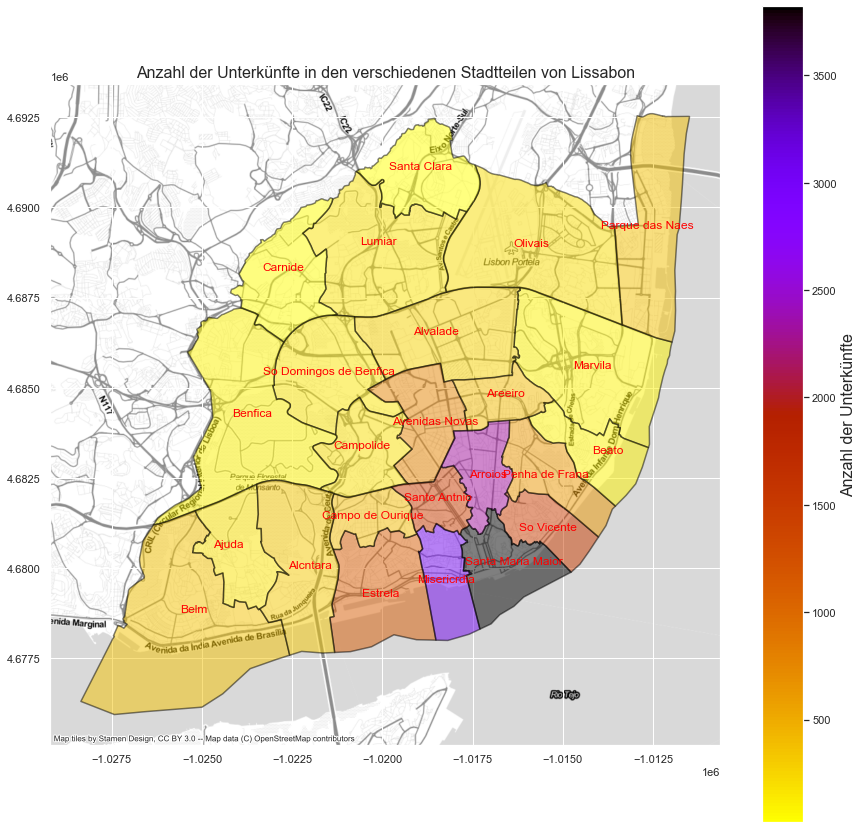

In [36]:
df_spatial_number_of_places = df_geo_lisbon.merge(number_of_places_per_hood.to_frame(name='Count'), left_on='neighbourhood', right_on='neighbourhood')

fig, ax = plt.subplots(figsize=(15,15))
df_spatial_number_of_places.plot(ax=ax, column='Count', cmap='gnuplot_r', linewidth=1.5, edgecolor='black', legend=True, alpha=0.5)
plt.gcf().get_axes()[1].set_ylabel('Anzahl der Unterkünfte', fontsize=16)
plt.title('Anzahl der Unterkünfte in den verschiedenen Stadtteilen von Lissabon', fontsize=16)
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)

plot_neighbourhoods_labels(df_spatial_number_of_places)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Die meisten Unterkünfte sind in dem Stadtteil Santa Maria Maior. Hier befinden sich auch die meisten touristischen Sehenswürdigkeiten.
</div>

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h5>Prozentualer Anteil der Unterkunftsart "Entire home" in den verschiedenen Stadtteilen von Lissabon:</h5>
</div>

In [37]:
entirehome_percentage = (df_base_lisbon[['neighbourhood', 'room_type']]
                         [df_base_lisbon['room_type'] == 'Entire home/apt'].groupby('neighbourhood').count() /
                         df_base_lisbon[['neighbourhood', 'room_type']].groupby('neighbourhood').count() *
                         100).sort_values(by='room_type', ascending=False)
entirehome_percentage

,room_type
neighbourhood,
So Vicente,86.671177
Santa Maria Maior,86.312484
Misericrdia,85.011258
Parque das Naes,81.769437
Ajuda,81.420765
Estrela,78.914591
Belm,74.722222
Campo de Ourique,74.436090
Alcntara,74.251497


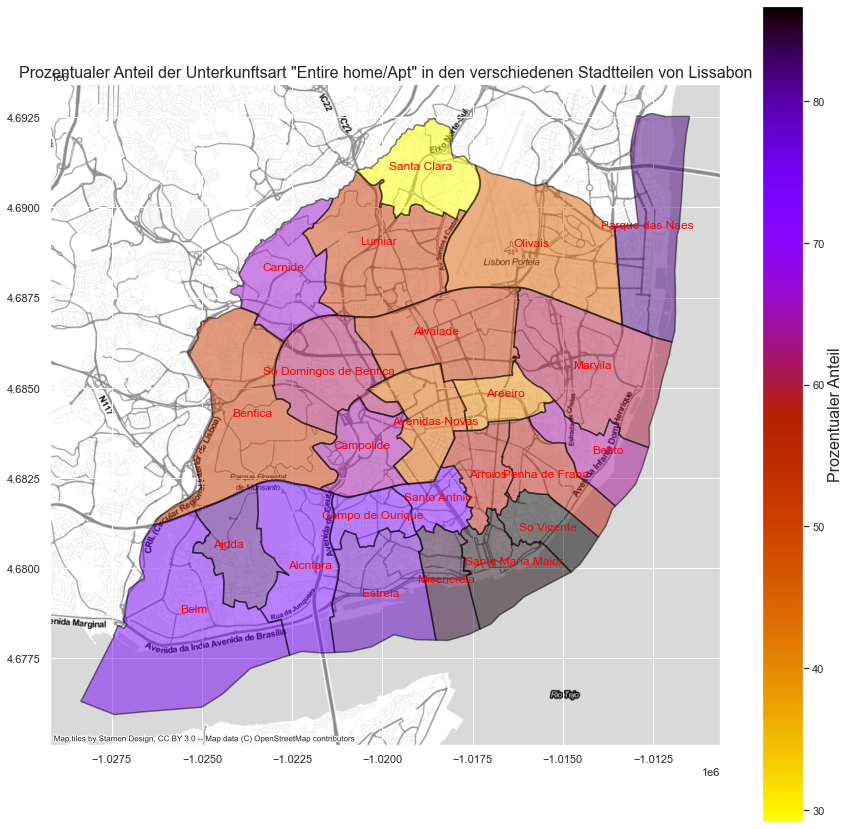

In [38]:
df_spatial_entirehome_percentage = df_geo_lisbon.merge(entirehome_percentage, left_on='neighbourhood', right_on='neighbourhood')

fig, ax = plt.subplots(figsize=(15,15))
df_spatial_entirehome_percentage.plot(ax=ax, column='room_type', cmap='gnuplot_r', linewidth=1.5, edgecolor='black', legend=True, alpha=0.5)
plt.gcf().get_axes()[1].set_ylabel('Prozentualer Anteil', fontsize=16)
plt.title('Prozentualer Anteil der Unterkunftsart \"Entire home/Apt\" in den verschiedenen Stadtteilen von Lissabon', fontsize=16)
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)

plot_neighbourhoods_labels(df_spatial_number_of_places)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h1 style=font-size:40px> Datenbereinigung und Feature Engineering </h1>
</div>

In [39]:
df_base_lisbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18173 entries, 0 to 18172
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  18160 non-null  float64
 1   host_has_profile_pic       18173 non-null  bool   
 2   neighbourhood              18173 non-null  object 
 3   latitude                   18173 non-null  float64
 4   longitude                  18173 non-null  float64
 5   property_type              18173 non-null  object 
 6   room_type                  18173 non-null  object 
 7   accommodates               18173 non-null  int64  
 8   bathrooms                  18155 non-null  float64
 9   bedrooms                   18166 non-null  float64
 10  beds                       18095 non-null  float64
 11  amenities                  18173 non-null  object 
 12  price                      18173 non-null  float32
 13  security_deposit           14060 non-null  flo

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Ermittlung der fehlenden Werte -> gemeinsame Überlegungn: Daten löschen, ersetzen durch Mittelwert/Median 
</div>

<img src="Data_clean.png" width="500" />

In [40]:
df_base_lisbon.shape

(18173, 20)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Löschen der Zeilen, die "NaN" enthalten.
</div>

In [41]:
df_base_lisbon = df_base_lisbon.dropna(subset=['host_total_listings_count', 'bathrooms', 'bedrooms','beds'])
df_base_lisbon = df_base_lisbon.reset_index(drop=True)
df_base_lisbon.shape

(18062, 20)

In [42]:
df_base_lisbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  18062 non-null  float64
 1   host_has_profile_pic       18062 non-null  bool   
 2   neighbourhood              18062 non-null  object 
 3   latitude                   18062 non-null  float64
 4   longitude                  18062 non-null  float64
 5   property_type              18062 non-null  object 
 6   room_type                  18062 non-null  object 
 7   accommodates               18062 non-null  int64  
 8   bathrooms                  18062 non-null  float64
 9   bedrooms                   18062 non-null  float64
 10  beds                       18062 non-null  float64
 11  amenities                  18062 non-null  object 
 12  price                      18062 non-null  float32
 13  security_deposit           14031 non-null  flo

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Berechnung der Mediane und Mittelwerte der Spalten, die zu viele fehlende Werte enthalten. 
</div>

In [43]:
avg1=df_base_lisbon['security_deposit'].astype('float').mean(axis=0)
median1=df_base_lisbon['security_deposit'].astype('float').median(axis=0)
print("security_deposit     - Mittelwert:",avg1,"Median:",median1)

avg2=df_base_lisbon['cleaning_fee'].astype('float').mean(axis=0)
median2=df_base_lisbon['cleaning_fee'].astype('float').median(axis=0)
print("cleaning_fee         - Mittelwert:",avg2,"Median:",median2)

avg3=df_base_lisbon['review_scores_rating'].astype('float').mean(axis=0)
median3=df_base_lisbon['review_scores_rating'].astype('float').median(axis=0)
print("review_scores_rating - Mittelwert:",avg3,"Median:",median3)

security_deposit     - Mittelwert: 120.80813912051885 Median: 100.0
cleaning_fee         - Mittelwert: 28.620730040991607 Median: 30.0
review_scores_rating - Mittelwert: 92.00158800736835 Median: 94.0


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Entscheidung: Ersetzung durch Median
</div>

In [44]:
df_base_lisbon['security_deposit'].replace(np.nan, median1, inplace=True)
df_base_lisbon['cleaning_fee'].replace(np.nan, median2, inplace=True)
df_base_lisbon['review_scores_rating'].replace(np.nan, median3, inplace=True)

In [45]:
df_base_lisbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  18062 non-null  float64
 1   host_has_profile_pic       18062 non-null  bool   
 2   neighbourhood              18062 non-null  object 
 3   latitude                   18062 non-null  float64
 4   longitude                  18062 non-null  float64
 5   property_type              18062 non-null  object 
 6   room_type                  18062 non-null  object 
 7   accommodates               18062 non-null  int64  
 8   bathrooms                  18062 non-null  float64
 9   bedrooms                   18062 non-null  float64
 10  beds                       18062 non-null  float64
 11  amenities                  18062 non-null  object 
 12  price                      18062 non-null  float32
 13  security_deposit           18062 non-null  flo

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h5>Konvertierung der Kategorien in Zahlen </h5>
</div>

<div class="alert alert-info alertinfo" style="margin-top: 20px">
1. Room Type
</div>

In [46]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
roomtype_cat_1hot = cat_encoder.fit_transform(df_base_lisbon[['room_type']]).toarray()
df_cat_1hot = pd.DataFrame(roomtype_cat_1hot, columns=cat_encoder.categories_, dtype='int8')

df_base_lisbon = pd.concat([df_base_lisbon, df_cat_1hot], axis=1)
df_base_lisbon = df_base_lisbon.drop('room_type', axis=1)
#df_base_lisbon.info()

<div class="alert alert-info alertinfo" style="margin-top: 20px">
2. Property Type
</div>

In [47]:
cat_encoder = OneHotEncoder()
propertytype_cat_1hot = cat_encoder.fit_transform(df_base_lisbon[['property_type']]).toarray()
df_cat_1hot = pd.DataFrame(propertytype_cat_1hot, columns=cat_encoder.categories_, dtype='int8')

df_base_lisbon = pd.concat([df_base_lisbon, df_cat_1hot], axis=1)
df_base_lisbon = df_base_lisbon.drop('property_type', axis=1)
#df_base_lisbon.info()

<div class="alert alert-info alertinfo" style="margin-top: 20px">
3. Neighbourhood
</div>

In [48]:
cat_encoder = OneHotEncoder()
neighbour_cat_1hot = cat_encoder.fit_transform(df_base_lisbon[['neighbourhood']]).toarray()
df_cat_1hot = pd.DataFrame(neighbour_cat_1hot, columns=cat_encoder.categories_, dtype='int8')

df_base_lisbon = pd.concat([df_base_lisbon, df_cat_1hot], axis=1)
df_base_lisbon = df_base_lisbon.drop('neighbourhood', axis=1)
#df_base_lisbon.info()

In [49]:
df_base_lisbon['amenities'].iloc[1:3]

1    {TV,"Cable TV",Internet,Wifi,Kitchen,"Paid par...
2    {TV,Internet,Wifi,Kitchen,"Paid parking off pr...
Name: amenities, dtype: object

In [50]:
# AMENITIES
tmp_lst = df_base_lisbon['amenities'].iloc[0].split(',')
tmp_lst = [k.replace('"', '') for k in tmp_lst]
for index, value in df_base_lisbon['amenities'].iloc[1:3].items():
    tmp_lst2 = value.split(',')
    tmp_lst2 = [k.replace('"', '') for k in tmp_lst]
    print(tmp_lst2)
    for j in tmp_lst2:
        if j not in tmp_lst:
            print(j)
            tmp_lst.append(j)
print(tmp_lst)


['{TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Ethernet connection', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Long term stays allowed}']
['{TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Ethernet connection', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Long term stays allowed}']
['{TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Ethernet connection', 'Microwave', 'Coffee make

In [51]:
df_model = df_base_lisbon.copy()
df_model = df_model.drop(['amenities', 'cancellation_policy'], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  18062 non-null  float64
 1   host_has_profile_pic       18062 non-null  bool   
 2   latitude                   18062 non-null  float64
 3   longitude                  18062 non-null  float64
 4   accommodates               18062 non-null  int64  
 5   bathrooms                  18062 non-null  float64
 6   bedrooms                   18062 non-null  float64
 7   beds                       18062 non-null  float64
 8   price                      18062 non-null  float32
 9   security_deposit           18062 non-null  float32
 10  cleaning_fee               18062 non-null  float32
 11  guests_included            18062 non-null  int64  
 12  extra_people               18062 non-null  float32
 13  minimum_nights             18062 non-null  int

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Label Preis wurde auf 250 € begrenzt.
</div>

In [52]:
df_model = df_model.drop(df_model[df_model['price'] > 250].index)
df_model = df_model.reset_index(drop=True)
df_model.shape

(17457, 72)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h5>Aufteilung in Prädikator- und Zielvariable </h5>
</div>

In [53]:
df_model_price = df_model['price']
df_model_features = df_model.drop(['price'], axis=1)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h5>Standardisierung der Features (Nur der Features mit stetigen Werten (keine Kategorien)) </h5>
</div>

In [54]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_model_features.iloc[:, 0:14] = pd.DataFrame(standard_scaler.fit_transform(df_model_features.iloc[:, 0:14]), 
                                               columns=df_model_features.columns.values[0:14])

In [55]:
df_model_features.head()

,host_total_listings_count,host_has_profile_pic,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,...,"(Marvila,)","(Misericrdia,)","(Olivais,)","(Parque das Naes,)","(Penha de Frana,)","(Santa Clara,)","(Santa Maria Maior,)","(Santo Antnio,)","(So Domingos de Benfica,)","(So Vicente,)"
0,-0.314941,0.033867,-1.579136,-3.006294,-0.386138,-0.476973,-0.530242,-0.797455,-0.065839,0.376505,...,0,0,0,0,0,0,0,0,0,0
1,-0.314941,0.033867,-0.605637,0.883895,-0.386138,-0.476973,-0.530242,-0.797455,0.182126,0.091770,...,0,0,0,0,0,0,1,0,0,0
2,-0.287058,0.033867,-0.537127,0.920924,0.120804,-0.476973,-0.530242,-0.157460,-0.561769,0.661240,...,0,0,0,0,0,0,1,0,0,0
3,-0.301000,0.033867,-0.558659,0.779888,0.120804,-0.476973,-0.530242,-0.797455,0.182126,0.091770,...,0,0,0,0,0,0,1,0,0,0
4,-0.314941,0.033867,1.707403,-0.526462,-0.386138,-0.476973,-0.530242,-0.157460,1.917880,0.091770,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Aufteilung in Trainings- und Testdaten (80%/20%).
</div>

In [56]:
#from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(df_model_features, df_model_price, 
#                                                    test_size=0.2, random_state=1)

#x_train, x_test, y_train, y_test = train_test_split(df_model_features.iloc[:, 0:72], df_model_price, 
#                                                    test_size=0.2, random_state=1)

#print("Testdaten: ", x_test.shape)
#print("Trainingsdaten: ",x_train.shape)

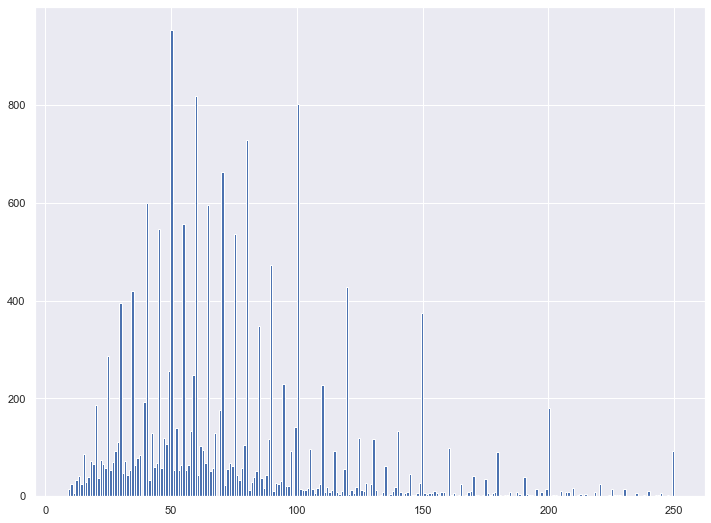

In [57]:
df_model_price.hist(bins=250)

In [58]:
df_model['price_cat'] = pd.cut(df_model['price'],
                               bins=[0., 10., 20., 30., 40., 50., 60., 70., 100., 150., np.inf], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_model, df_model['price_cat']):
    strat_train_set = df_model.loc[train_index]
    strat_test_set = df_model.loc[test_index]

In [60]:
distribution_test_set = strat_test_set['price_cat'].value_counts()/len(strat_test_set)
distribution_train_set = strat_train_set['price_cat'].value_counts()/len(strat_train_set)
distribution_overall = df_model['price_cat'].value_counts()/len(df_model)
pd.DataFrame({'Overall %': distribution_overall,
              'Test Set %': distribution_test_set,
              'Train Set %': distribution_train_set,
              'Test Set % Deviation': ((distribution_test_set - distribution_overall) / distribution_overall * 100),
              'Train Set % Deviation': ((distribution_train_set - distribution_overall) / distribution_overall * 100)
             }).sort_index()

,Overall %,Test Set %,Train Set %,Test Set % Deviation,Train Set % Deviation
1,0.002349,0.002291,0.002363,-2.455787,0.614079
2,0.033625,0.033792,0.033584,0.493803,-0.123477
3,0.071261,0.071306,0.071250,0.063190,-0.015801
4,0.094747,0.094788,0.094737,0.043267,-0.010819
5,0.133414,0.133448,0.133405,0.025747,-0.006438
6,0.124936,0.124857,0.124955,-0.063025,0.015760
7,0.113422,0.113402,0.113426,-0.017182,0.004296
8,0.245174,0.245132,0.245184,-0.017182,0.004296
9,0.124936,0.124857,0.124955,-0.063025,0.015760
10,0.056138,0.056128,0.056140,-0.017182,0.004296


In [61]:
# Remove the "income_cat" feature so that data is back in its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('price_cat', axis=1, inplace=True)

In [62]:
train_set = strat_train_set.reset_index(drop=True)
test_set = strat_test_set.reset_index(drop=True)

In [63]:
x_train = train_set.drop(['price'], axis=1)
y_train = train_set['price']

x_test = test_set.drop(['price'], axis=1)
y_test = test_set['price']

In [64]:
x_train = x_train.iloc[:, 4:19]

x_test = x_test.iloc[:, 4:19]

In [65]:
print("Trainingsdaten: ",x_train.shape)
print("Testdaten: ", x_test.shape)

Trainingsdaten:  (13965, 15)
Testdaten:  (3492, 15)


<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h1 style=font-size:40px>Modelauswahl und Training - lineares Regressionsmodel / Random Forest</h1>
</div>

In [66]:
from sklearn.linear_model import LinearRegression

lre = LinearRegression()
lre.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print(f'Intercept: {lre.intercept_:.1f}\n')

Intercept: -34.7



In [68]:
from sklearn.metrics import r2_score

lre_predictions_train = lre.predict(x_train)
lre_predictions_test = lre.predict(x_test)

lre_r2_train = r2_score(y_train, lre_predictions_train)
lre_r2_test = r2_score(y_test, lre_predictions_test)
print(f'R-Squared Train-Set: {lre_r2_train:.3f}\nR-Squared Test-Set:  {lre_r2_test:.3f}')

R-Squared Train-Set: 0.361
R-Squared Test-Set:  0.348


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Der berechnete R² für den Trainings- und Testdatensatz.
    <br> Der Trainingsdatensatz zeigt eine schwache Varianzerklärung.
    <br> Der Testdatensatz zeigt einen unrealistischen R².
</div>

In [69]:
def scatter_true_vs_predicted(train_labels, train_predictions, test_labels, test_predictions):
    plt.rcParams.update({'axes.labelsize': 16})
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    ax1.scatter(train_labels, train_predictions, s=2, alpha=0.3)
    ax1.scatter(test_labels, test_predictions, s=2, alpha=0.3, color='red')
    ax2.scatter(train_labels, train_predictions, s=2, alpha=0.3, label='Train-Set')
    ax2.scatter(test_labels, test_predictions, s=2, alpha=0.3, color='red', label='Test-Set')
    ax1.plot([0, 250], [0, 250], color='black'); ax2.plot([0, 250], [0, 250], color='black')
    ax1.axis('equal')
    ax2.set_xlim([0, 250]); ax2.set_ylim([0, 250])
    ax1.set_title('True vs. Predicted'); ax2.set_title(ax1.get_title() + "; Zoom")
    ax1.set_xlabel('True \"price\"'); ax2.set_xlabel(ax1.get_xlabel())
    ax1.set_ylabel('Predicted \"price\"'); ax2.set_ylabel(ax1.get_ylabel())
    ax2.legend();

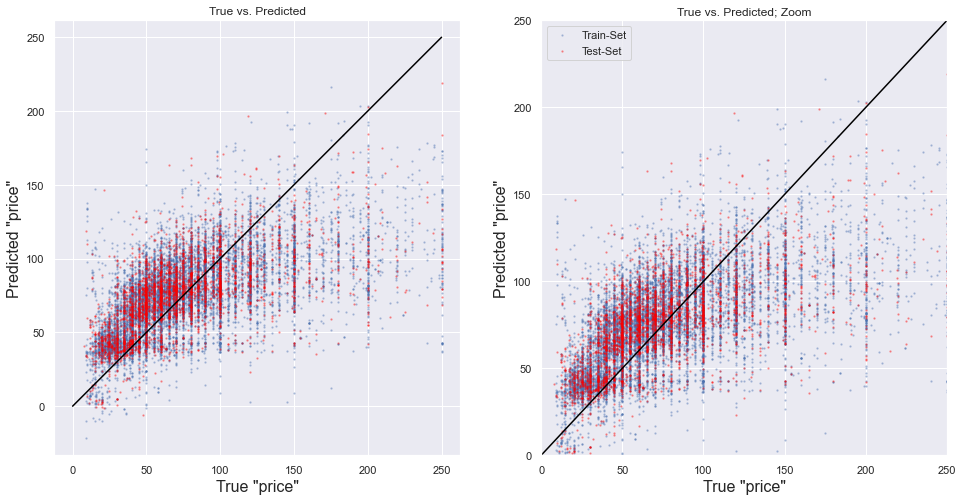

In [70]:
scatter_true_vs_predicted(y_train, lre_predictions_train, y_test, lre_predictions_test)

In [71]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sn.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sn.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('relative Häufigkeit der Preise')

    plt.show()
    plt.close()

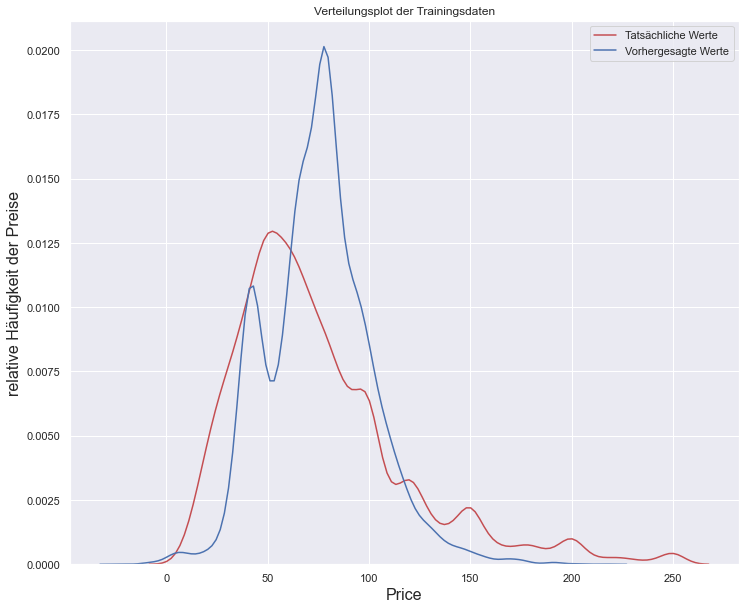

In [72]:
Title = 'Verteilungsplot der Trainingsdaten'
DistributionPlot(y_train, lre_predictions_train, "Tatsächliche Werte", "Vorhergesagte Werte", Title)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Im Bereich zwischen ca. 60 Euro und 120 Euro wird die Häufigkeit zu hoch geschätzt.
</div>

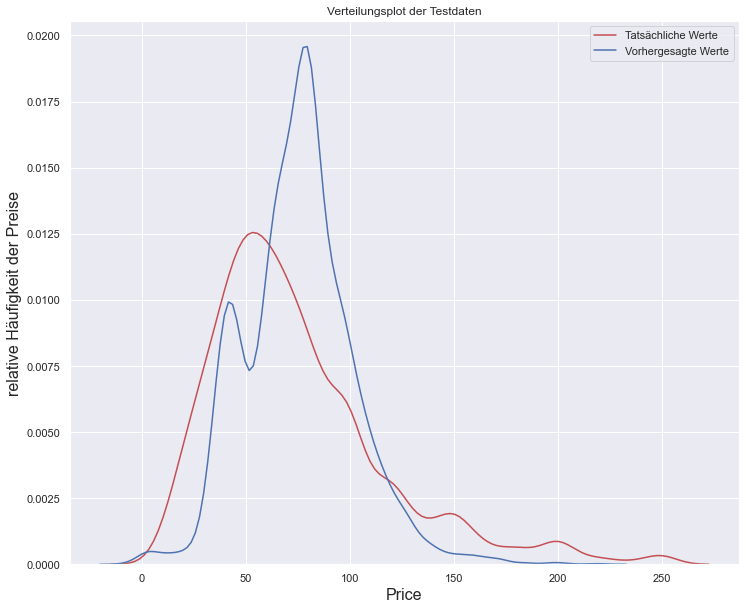

In [73]:
Title = 'Verteilungsplot der Testdaten'
DistributionPlot(y_test, lre_predictions_test, "Tatsächliche Werte", "Vorhergesagte Werte", Title)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
    <h2>Random Forest Regression</h2>
</div>

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Zur Justierung der Modelparameter benötigt man GridSearchCV.
</div>

In [74]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [24],
#   'max_depth': [24, 27, 30, 33, 36],
    'n_estimators': [300]
#   'n_estimators': [100, 200, 300]
}

In [75]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

#forest_reg.fit(x_train, y_train)  ### wenn man kein GridSearchCV verwendet

In [76]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 
### cv=cross validation, n_jobs=-1 -> benutze alle zur Verfügung stehenden Cores

In [77]:
# Fit the grid search to the data
grid_search.fit(x_train.iloc[:, 0:49], y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

<div class="alert alert-info alertinfo" style="margin-top: 20px">
folds -> cv
<br> candidates -> Kombinationsmöglichkeiten im param_grid
</div>

In [78]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=24, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Bestes Ergebnis wird hier dargestellt (wenn mehrere Parameter im param_grid eingestellt werden)
</div>

In [79]:
from sklearn.metrics import mean_squared_error

predictions_forest_train = grid_search.predict(x_train)
predictions_forest_test = grid_search.predict(x_test)
forest_rmse_train = np.sqrt(mean_squared_error(y_train, predictions_forest_train))
forest_rmse_test = np.sqrt(mean_squared_error(y_test, predictions_forest_test))
print(f"rmse Trainingsdaten: {forest_rmse_train:.2f}")
print(f"rmse Testdaten: {forest_rmse_test:.2f}")

rmse Trainingsdaten: 13.82
rmse Testdaten: 30.50


<div class="alert alert-info alertinfo" style="margin-top: 20px">
Starker Unterschied zwischen den zwei rmse-Werten -> <b>Over-fitting!</b>
    <br> Fehlschätzung um 10 und 28 Dollar.
</div>

In [80]:
forest_r2_train = r2_score(y_train, predictions_forest_train)
forest_r2_test = r2_score(y_test, predictions_forest_test)

In [81]:
forest_r2_train

0.8957904997708424

In [82]:
forest_r2_test

0.4869679635066694

<div class="alert alert-info alertinfo" style="margin-top: 20px">
R² ähnlich gut bzw. schlecht wie die rmse Werte.
</div>

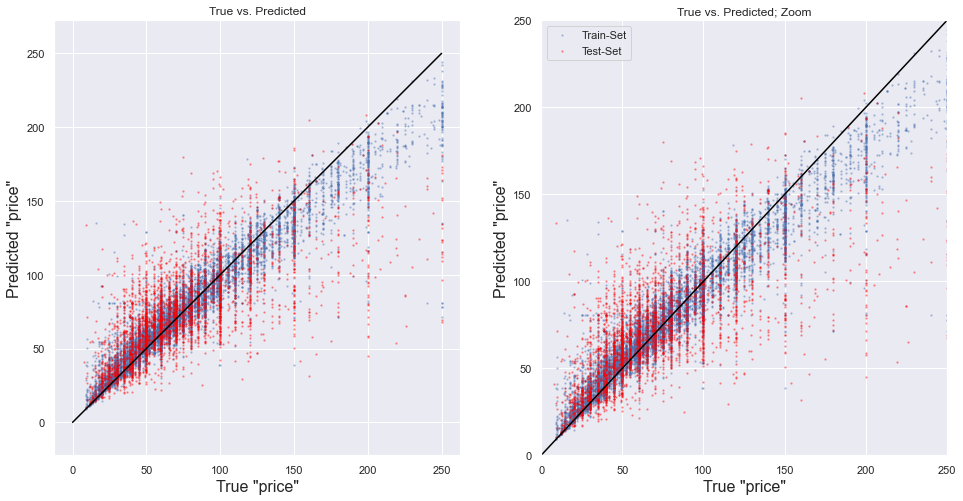

In [83]:
scatter_true_vs_predicted(y_train, predictions_forest_train, y_test, predictions_forest_test)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Keine Ausreißer wie bei der linearen Regression. Testdaten weisen eine höhere Streuung auf (rote Punkte).
<br> (Zoom ist hier eigentlich nicht notwendig.)
</div>

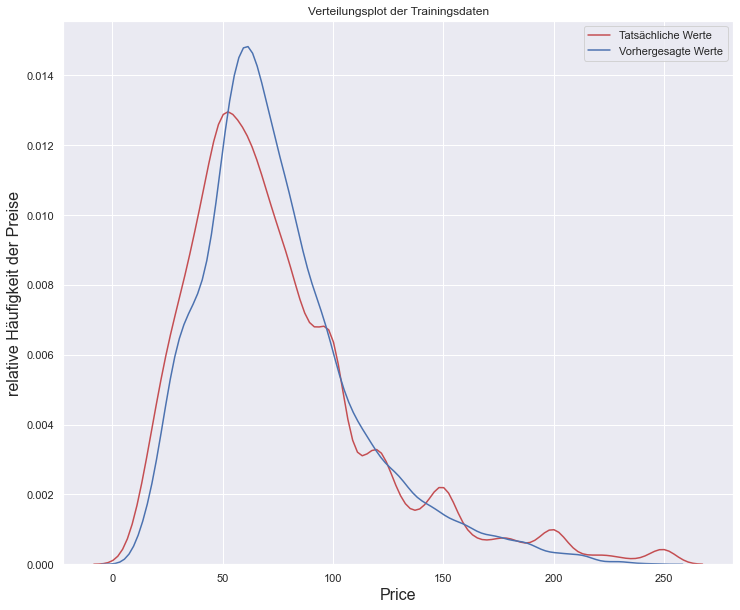

In [84]:
Title = 'Verteilungsplot der Trainingsdaten'
DistributionPlot(y_train, predictions_forest_train, "Tatsächliche Werte", "Vorhergesagte Werte", Title)

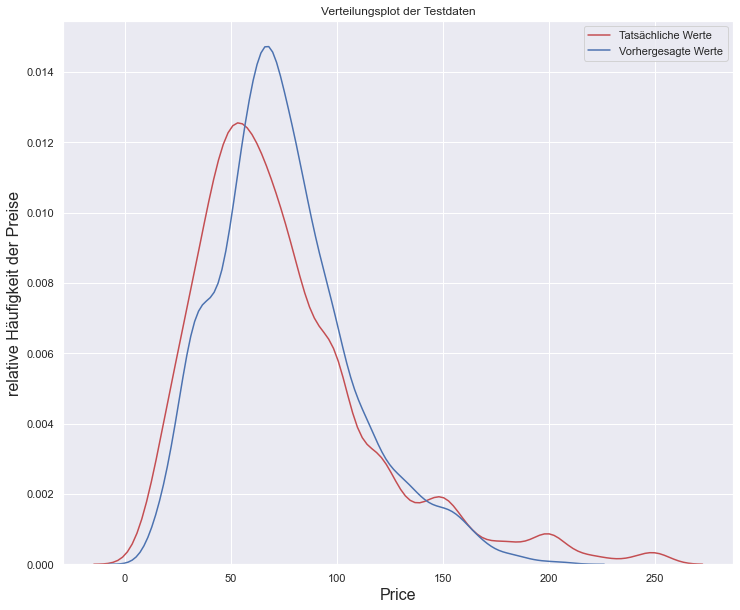

In [85]:
Title = 'Verteilungsplot der Testdaten'
DistributionPlot(y_test, predictions_forest_test, "Tatsächliche Werte", "Vorhergesagte Werte", Title)

<div class="alert alert-info alertinfo" style="margin-top: 20px">
Starke Verbesserung gegenüber Linearer Regression! Allerdings immer noch nicht zufriedenstellend.<br>
Lineare Regression,       R-Squared Test-Set: 0.348<br>
Random Forest Regression,  R-Squared Test-Set: 0.487
</div>